# DATABASE FOR JOBS ON INDEED FOR FINANCE

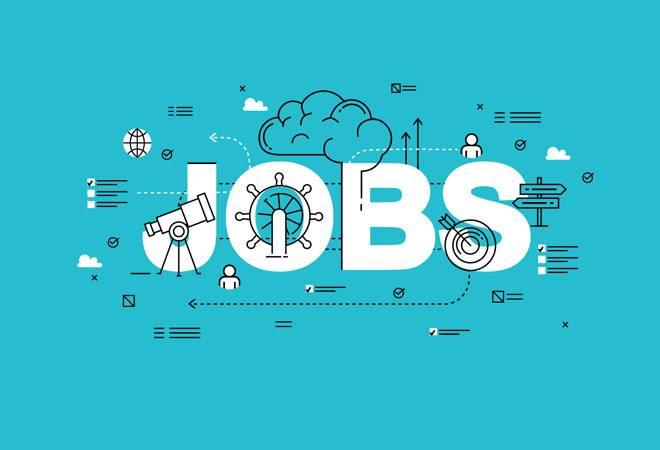

In [15]:
from IPython.display import Image
Image(filename='Jobs1.jpg', width=1000, height=600)

Parth Suresh Bhanushali NUID: 001409809, (bhanushali.p@husky.neu.edu)

### Abstract

Looking for jobs or internships seems a task of its own and the search is no longer based on sole fulfillment of the required job skills, but a lot of networking and recommendations is involved around too. The amount of work involved in finding the correct job builds a great amount of anxiety among the job seekers and the recruiters who want the right talent for their company.

There are two concerns that are to be addressed here. First, matching the job seekers with the right employers and second, provide guidance to aspiring job seekers on the skills that are in demand so that they can build them to stay relevant in the job market.
The job providers and job seekers form a large amount of data which provides for many interesting trends for analysis and interpretation to make the most of data available.

With the data currently available from the seekers and providers, these pitfalls can be fixed. The presence of information on job skills, salaries and user tendencies in many existing websites such as Indeed, LinkedIn, Glassdoor etc can be utilized to match people to positions which may seem simply impossible without using AI to analyze data.

The jobs database would be a one stop solution to reduce the job search and talent acquisition stress levels. Artificial intelligence (AI) and machine learning can be utilized for complex task of matching work to talent so that it is efficient and less resume spamming.


### What I tried to do here.

In [ ]:
Here I have created a database for jobs in finance domain, based on salary, location, job type, etc.
This is small database to find jobs based on requirements like salary offered or location, or such use cases. 

### Data

Data has been scrapped from Indeed using beautiful soup.

# Importing libraries

In [2]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [3]:
import urllib3

# Declaring the source and prettifying to make HTML readable (Indeed)

In [4]:
source = requests.get('https://www.indeed.com/q-finance-l-Boston,-MA-jobs.html').text

In [5]:
soup = BeautifulSoup(source, 'lxml')

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script src="/s/f2cb3a7/en_US.js" type="text/javascript">
  </script>
  <script>
   !function(n){function r(n){for(var r=a,t=n.length;t;)r=33*r^n.charCodeAt(--t);return r>>>0}var t=this['indeed.i18n.localeData'],e=t['']||{},a=e.salt;if(e.hasOwnProperty('salt'))for(var i in n)t[function(n){var t=r(n);return e.hasOwnProperty('id_length')&&(t=String(t).substring(0,e.id_length)),t}(i)]=n[i];else for(var i in n)t[i]=[null].concat(n[i])}({"indeedapply_serp_label":["Apply instantly"]});
  </script>
  <link href="/s/97464e7/jobsearch_all.css" rel="stylesheet" type="text/css"/>
  <link href="http://rss.indeed.com/rss?q=finance&amp;l=Boston%2C+MA" rel="alternate" title="Finance Jobs, Employment in Boston, MA" type="application/rss+xml"/>
  <link href="/m/jobs?q=finance&amp;l=Boston%2C+MA" media="only screen and (max-width: 640px)" rel="alternate"/>
  <link href="/m/jobs?q=fi

# Inspecting elements of the HTML to scrape tags and links

In [7]:
indeed_jobs_page = soup.find('div', class_="jobsearch-SerpJobCard") #defining class of the page to be extracted

In [8]:
len(indeed_jobs_page) # checking length of jobs on the page

11

In [9]:
url = f"https://www.indeed.com/jobs?q=finance&l=MA"
link = requests.get(url)
page = BeautifulSoup(link.content, 'html.parser') 

In [10]:
x = page.select('.jobsearch-SerpJobCard')

In [11]:
x[0].select('.jobtitle')[0].text.strip() #class of job titles

'Finance Assistant'

In [12]:
x[0].select('.company')[0].text.strip() #class of company

'Grassroots Campaigns'

In [13]:
x[0].select('.location')[0].text #class of location

'Boston, MA'

In [14]:
x[0].select('.summary')[0].text.strip() #class of summary

"_We're committed to building a diverse leadership team. Grassroots Campaigns is a national progressive organization that specializes in running face-to-face campaigns for political parties, candidates..."

In [15]:
#x[3].select('.salary')[0].text.strip() #class of salary

In [16]:
x[0].select('.jobtitle ')[0] 

<a class="jobtitle turnstileLink " data-tn-element="jobTitle" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0A96NkE_20gK72Iz8j9I66ESmW1HhtAQ0NY5jQFWzzR6G6gebuXI4NS7kOuHBGprR7Gd2MUJVBeiDrPsPMXgrBmwSvt8wK33XC_xLlOr6pY4W0qLl5jAbx4ADMHTAiXGBkkF3OecO_jfY9pe9a9J6IStpcrYGo1YApUdBEXGlun9cfYCEF7rOFEksFSS6Ysqn8TC1XUkep7q3lYfSK6pfKD77pxLK2EYHjhA-iqRVtCxKBqKCEs2tHroiX2-KJxQ3TIBUExxIx4BkLrSEY_BclttnCtbiglJYtwL4Hm1ZGn8Tp3rb4GvJ8pspvdl8OpSkr277hBpCR_xDeoC1yR8MVn29zQiiTLsHXiT7dIdN9PKOx6cZm2aBom5XfW83fhj_5bowd_bvdZEzsHqzNFrnVHdvXpzyOSyoWwKEbAS2hxvj1I8YeO6GAA-AMQ6eQXR_Rf9J3rwqWVCxumbgCaViuT90McHeTM-Lvo5TqZ9BPHOI1Z7_YXr5CI&amp;vjs=3&amp;p=1&amp;fvj=1" id="sja1" onclick=" setRefineByCookie([]); sjoc('sja1', 0); convCtr('SJ')" onmousedown="sjomd('sja1'); clk('sja1');" rel="noopener nofollow" target="_blank" title="Finance Assistant">
<b>Finance</b> Assistant</a>

In [17]:
extension = x[0].select('.jobtitle ')[0]['href'] #class of lik to redirect to proper job description of page

In [18]:
base_url = 'https://www.indeed.com'

In [19]:
url1 = base_url + extension

###### Checking if the page is redirected to proper Job on Indeed

In [20]:
url1 #here I was just checking if the page is correctly redirected 

'https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0A96NkE_20gK72Iz8j9I66ESmW1HhtAQ0NY5jQFWzzR6G6gebuXI4NS7kOuHBGprR7Gd2MUJVBeiDrPsPMXgrBmwSvt8wK33XC_xLlOr6pY4W0qLl5jAbx4ADMHTAiXGBkkF3OecO_jfY9pe9a9J6IStpcrYGo1YApUdBEXGlun9cfYCEF7rOFEksFSS6Ysqn8TC1XUkep7q3lYfSK6pfKD77pxLK2EYHjhA-iqRVtCxKBqKCEs2tHroiX2-KJxQ3TIBUExxIx4BkLrSEY_BclttnCtbiglJYtwL4Hm1ZGn8Tp3rb4GvJ8pspvdl8OpSkr277hBpCR_xDeoC1yR8MVn29zQiiTLsHXiT7dIdN9PKOx6cZm2aBom5XfW83fhj_5bowd_bvdZEzsHqzNFrnVHdvXpzyOSyoWwKEbAS2hxvj1I8YeO6GAA-AMQ6eQXR_Rf9J3rwqWVCxumbgCaViuT90McHeTM-Lvo5TqZ9BPHOI1Z7_YXr5CI&vjs=3&p=1&fvj=1'

In [21]:
url1 = 'https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0D3H7D_N5lj7_YwDawoaSDFaxypM2ccOgsm_ZtiDaSTlfqHArD_h44wMkavrAkYA9VaN-CsShPIwL7ZO298B2yIdGb7h0cbmoGCB4PCwJc2_aBTkjKSovLESf5KDk-g76C3LkeYz3pqB7UPNsGQh02XCr0qt4PBFzbS58HKJD4eR8WEBWFRmxfuhqNMIzWJwD07nkgCVmyDHUyhoyjwAD35qOwe76JzcZYEMQX1wc-DlYeZy2s8Fk2DP_7mtrX6-GeQX3c9bGr4K3-zuJDM1GpH_eNNgywmOLh-BlM_fjJ0dp3AJ2C1RqxYjadT7DQAmNR8U_FwATbGYRqTv90QvWN0Ea1u0B0gpcCwYnWlfyEfPE98oJDrW9kMiW_yfk7LA-hUe_MXVBYpWX54JJGbbV630hpxMImJNechrLlasl6BWLa_l9hIZPCSK_WYHmPeacjW4Qf1vTSv5g==&vjs=3&p=1&fvj=1'
link1 = requests.get(url1)
page = BeautifulSoup(link1.content, 'html.parser')

In [22]:
y = page.select('.jobsearch-JobComponent-description')

In [23]:
y[0].text #scraping text of extracted URL

'$50,000 - $60,000 a yearThis position requires an intelligent, flexible person willing to learn new tasks and problem solve to advance the mission of Make-A-Wish® Massachusetts and Rhode Island. This generalist role will be responsible for performing routine accounting, benefits administration, and other operational functions to support the finance and operations department of the organization. This position requires an individual who is IT-savvy and able and willing to assume trouble-shooting and problem-solving IT tasks in partnership with our national and local IT partners. The position will also be responsible for assisting the Volunteer Management and Wish Program departments on a variety of recurring duties and special projects. This full-time, exempt position is based in our Boston office.Job Type: Full-timeSalary: $50,000.00 to $60,000.00 /yearExperience:Operations: 1 year (Preferred)Finance: 1 year (Preferred)Benefits offered:Paid time offParental leaveHealth insuranceHealthc

In [24]:
text = y[0].text

# Creating a loop to extract all companies and create dataframe.

In [25]:
page_extract = page.select('.jobsearch-JobComponent-description') 

In [30]:
company = []
location = []
start = 0
for i in range(25):
        url = f"https://www.indeed.com/jobs?q=finance&l=Boston%2C+MA&start={start}"
        link = requests.get(url)
        page = BeautifulSoup(link.content, 'html.parser')
        start += 10
        for block in page.select('.jobsearch-SerpJobCard'):
            company.append(block.select('.company')[0].text.strip())
            location.append(block.select('.location')[0].text)
#creating loop for company table

In [32]:
title = []
summary=[]
salary = []
extract_text = []
#urltext = []
job_desc = []
start = 0
for i in range(50):
        url = f"https://www.indeed.com/jobs?q=finance&l=Boston%2C+MA&start={start}"
        link = requests.get(url)
        page = BeautifulSoup(link.content, 'html.parser')
        start += 10
        for block in page.select('.jobsearch-SerpJobCard'):
            title.append(block.select('.turnstileLink')[0].text.strip())
            #urltext.append(block.select('.turnstileLink')[0]['href'])
            summary_url = "https://www.indeed.com" + block.select('.turnstileLink')[0]['href']
            summary_page = requests.get(summary_url)
            summary_page_html = BeautifulSoup(summary_page.content,'html.parser')
            try:
                job_desc.append(summary_page_html.select('.jobsearch-JobComponent-description')[0].text)
            except:
                job_desc.append(None)
            summary.append(block.select('.summary')[0].text.strip())
            try:
                salary.append(block.select('.salary')[0].text.strip())
            except:
                salary.append(None)
#creating loop for job table

In [33]:
company_table = pd.DataFrame({
                'company': company,
                'location': location,
})
#datafram for company table

In [93]:
company_table.insert(0, 'CompID', range(100, 100 + len(company_table)))
#adding unique company id

In [35]:
#company_table['CompID'] = company_table.reset_index().index

In [91]:
job_table = pd.DataFrame({
                'title': title,
                'summary': summary,
                'job_desc': job_desc,
                'salary' : salary,
})
#dataframe for the job table

In [83]:
job_table_table.insert(0, 'JobID', range(0, 0 + len(job_table)))
#adding unique for jobs

In [ ]:
#company_table.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
#job_table.drop_duplicates(subset=None, keep='first', inplace=True)

In [94]:
company_table.to_csv('CompID.csv') #exporting data into csv file

In [84]:
job_table.to_csv('JobID.csv') #exporting data into csv file

In [76]:
company_table_filter = pd.read_csv('CompID.csv') #reading csv file to filter null values

In [85]:
job_table_filter = pd.read_csv('JobID.csv') #reading csv file to filter null values

# Filtering the data to remove null values inorder to make database more accurate.

In [77]:
company_table_filter.isnull()

,CompID,company,location
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [78]:
company_table_filter.isnull().sum()

CompID      0
company     0
location    0
dtype: int64

In [79]:
company_table_id = company_table_filter.dropna()

In [80]:
company_table_id.isnull().sum()

CompID      0
company     0
location    0
dtype: int64

In [81]:
company_table_id.to_csv('company_table_id_filter.csv',index=False) #saving filtered file into the csv

In [86]:
job_table_filter.isnull()

,Unnamed: 0,title,summary,job_desc,salary,JobID,CompID
0,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False
8,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False


In [87]:
job_table_filter.isnull().sum()

Unnamed: 0      0
title           0
summary         0
job_desc        0
salary        560
JobID           0
CompID          0
dtype: int64

In [88]:
job_table_id = job_table_filter.dropna()

In [89]:
job_table_id.isnull().sum()

Unnamed: 0    0
title         0
summary       0
job_desc      0
salary        0
JobID         0
CompID        0
dtype: int64

In [90]:
job_table_id.to_csv('job_table_id_filter.csv',index=False) #saving filtered file into csv

In [ ]:
def process_text(text):
    
        text = text.lower()
        text = text.replace(',', ' ')
        text = text.replace('/', ' ')
        text = text.replace('(', ' ')
        text = text.replace(')', ' ')
        text = text.replace('.', ' ')
        text = text.replace('[', ' ')
        text = text.replace(']', ' ')
        text = text.replace('"', ' ')
                        
 # Convert text string to a list of words
        return text.split()


def generate_ngrams(words_list, n):
    ngrams_list = []
 
    for num in range(0, len(words_list)):
        ngram = ' '.join(words_list[num:num + n])
        ngrams_list.append(ngram)
 
    return ngrams_list

"""
if __name__ == '__main__':
    words_list = process_text(text)
    unigrams = generate_ngrams(words_list, 1)
    bigrams = generate_ngrams(words_list, 2)
    trigrams = generate_ngrams(words_list, 3)
"""


In [ ]:
generate_ngrams(data_cleaning(y[0].text), 3)

In [ ]:
stop_words = stopwords.words('english') + list(string.punctuation) #list of stop words and punctuations

In [ ]:
def data_cleaning(combined_text):
    text = combined_text.lower() #converts everything to lower case charecters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)#replaces all the punctuations with none
    text = re.sub('\w*\d\w*', '', text) #removes all the numbers
    text = text.replace('\n','') #replaces all the tab charecters
    text = text.replace('\t','')#replaces all the tab charecters
    text = [i for i in word_tokenize(text) if i not in stop_words] #removing stop words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text] #Lemmantizing every word
    
    return text

In [ ]:
data_cleaning(y[0].text)

In [ ]:
for key, value in job_desc.items():
    num_Descriptions = len(value)
    if (num_Descriptions >= 50):
        num_Descriptions
        wordcloud_draw(value["Description"], key, 'white')

In [ ]:
def word_cloud_plot(text, title = "Word Cloud", mask = None):
    try:
        word_cloud = WordCloud(width=1600, height=800, max_font_size=200, mask = mask).generate(text)
    except:
        word_cloud = WordCloud(width=1600, height=800, max_font_size=200, mask = mask).fit_words(text)
        
    plt.figure(figsize=(20,15))
    plt.title(title, size = 25)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
data = job_desc

In [ ]:
stopwords = set(STOPWORDS)

def mywordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title:
        fig.subtitle(title, forsize=20)
        #fig.subplots_adjust(top=2,3)
    
    plt.imshow(wordcloud)
    plt.show()
    
mywordcloud(df["job_desc"].dropna())

Copyright

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.